In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_napsm = data[(data['Ptl_note']=='Naspm 100 uM')]

In [4]:
data_napsm

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
127,2017091301,27,2,1,1,0,1,"17,18","19,20",17,0,Reduction,Naspm 100 uM
128,2017091202,26,2,1,1,0,1,6,"7,8,9",17,0,Reduction,Naspm 100 uM
129,2017092702,28,1,1,1,0,1,33,34,17,0,Reduction,Naspm 100 uM
130,2017092901,30,2,1,1,0,1,45,46,17,0,Reduction,Naspm 100 uM
131,2017102601,25,2,1,1,0,1,4,"8,9,10,11",17,0,Reduction,Naspm 100 uM
132,2017102501,24,2,1,1,0,1,"10,11,12","13,14,15,16,17,18,19",17,0,Reduction,Naspm 100 uM
133,2017102301,23,2,1,1,0,1,"17,18","19,20,22",17,0,Reduction,Naspm 100 uM


In [5]:
data_napsm.drop(131, axis=0, inplace=True)
data_napsm.drop(133, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
data_napsm

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
127,2017091301,27,2,1,1,0,1,"17,18","19,20",17,0,Reduction,Naspm 100 uM
128,2017091202,26,2,1,1,0,1,6,"7,8,9",17,0,Reduction,Naspm 100 uM
129,2017092702,28,1,1,1,0,1,33,34,17,0,Reduction,Naspm 100 uM
130,2017092901,30,2,1,1,0,1,45,46,17,0,Reduction,Naspm 100 uM
132,2017102501,24,2,1,1,0,1,"10,11,12","13,14,15,16,17,18,19",17,0,Reduction,Naspm 100 uM


<Container object of 3 artists>

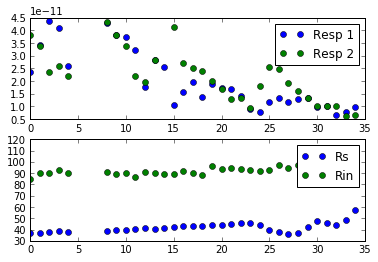

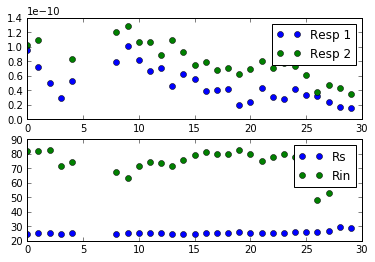

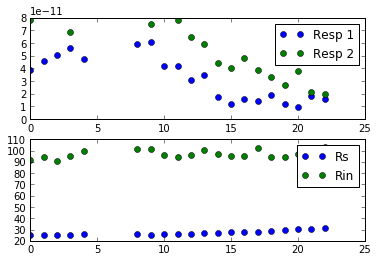

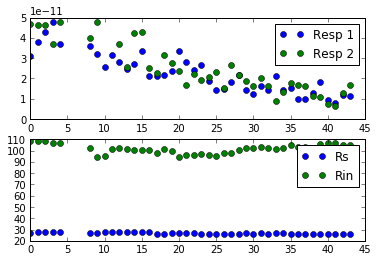

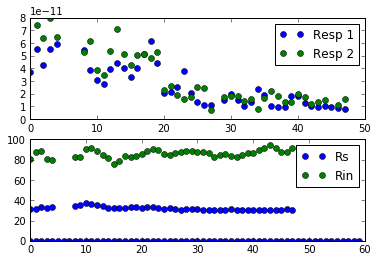

In [7]:
# patch_pip.df_ana(data_napsm,'/data/data_pre_naspm_reci', end_ana=[25,30,20,40,40])
patch_pip.df_ana(data_napsm,'/data/data_pre_naspm_reci')
data_pre_naspm_reci = pd.read_pickle('/data/data_pre_naspm_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(data_pre_naspm_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [8]:
data_pre_naspm_reci['Before'].index

Int64Index([127, 128, 129, 130, 132], dtype='int64')

(0, 1e-10)

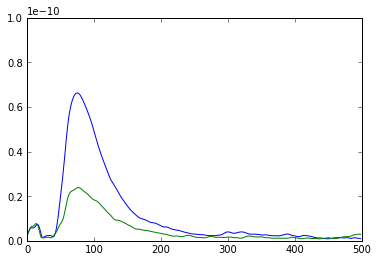

In [9]:
sample_id = 128
trace1 = np.nanmean(np.vstack(data_pre_naspm_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0)
trace2 = np.nanmean(np.vstack(data_pre_naspm_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0)
norm_trace1 = (trace1 - np.min(trace1))/np.max(trace1 - np.min(trace1))
norm_trace2 = (trace2 - np.min(trace2))/np.max(trace2 - np.min(trace2))
plt.plot(trace1)
plt.plot(trace2)
plt.ylim([0, 1e-10])
# with PdfPages('/data/Figure2_2.pdf') as pdf:
#     pdf.savefig()

<Container object of 3 artists>

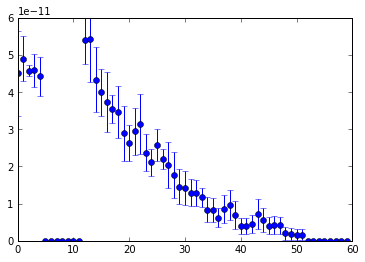

In [10]:
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [11]:
elimi = np.array([25,30,20,40,40])
elimi_sr = pd.Series(elimi, index=data_napsm.index)
data_pre_naspm_reci['elimi']=elimi_sr

In [12]:
spon_elimi_bef = {}
spon_elimi_aft = {}
spon_elimi_aft[127] = []   # 66 126
spon_elimi_aft[128] = [54,55,56,57,58,59,60,65,66]  # 36 96
spon_elimi_aft[129] = [9,10,17,24,31]  # 66 126
spon_elimi_aft[130] = [38,41,46, 47,51,52,57,61,66,67,69,78,81,82,86,88,93] # 36 96
spon_elimi_aft[132] = [47,49, 51,52,53,54,56,57, 60, 62, 63,65,67,69,73] # 66 126
spon_elimi_bef[127] = [0,7,8,9,11,12]   # 66 126
spon_elimi_bef[128] = [2,43,49]  # 36 96
spon_elimi_bef[129] = [2,15,22,29]  # 66 126
spon_elimi_bef[130] = [0,9,13,14,15,19,21,22,24,26,29,30,] # 36 96
spon_elimi_bef[132] = [2,8,12,18,34,48,51] # 66 126z

In [13]:
data_pre_naspm_reci['spon_elimi_bef'] = pd.Series(spon_elimi_bef, index=data_pre_naspm_reci.index)
data_pre_naspm_reci['spon_elimi_aft'] = pd.Series(spon_elimi_aft, index=data_pre_naspm_reci.index)

In [14]:
data_pre_naspm_reci.to_pickle('/data/ana_naspm')